<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/fastai/03_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *

In [3]:
path = Path('/content/CAMVID')
path = untar_data(URLs.CAMVID_TINY,data=path)
path.ls()

(#3) [Path('/content/CAMVID/camvid_tiny/labels'),Path('/content/CAMVID/camvid_tiny/codes.txt'),Path('/content/CAMVID/camvid_tiny/images')]

In [4]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [5]:
fnames = get_image_files(path/"images")
fnames[0]

Path('/content/CAMVID/camvid_tiny/images/0001TP_008580.png')

In [6]:
(path/"labels").ls()[0]


Path('/content/CAMVID/camvid_tiny/labels/0016E5_08093_P.png')

In [7]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"


In [8]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = fnames, label_func = label_func, codes = codes
)

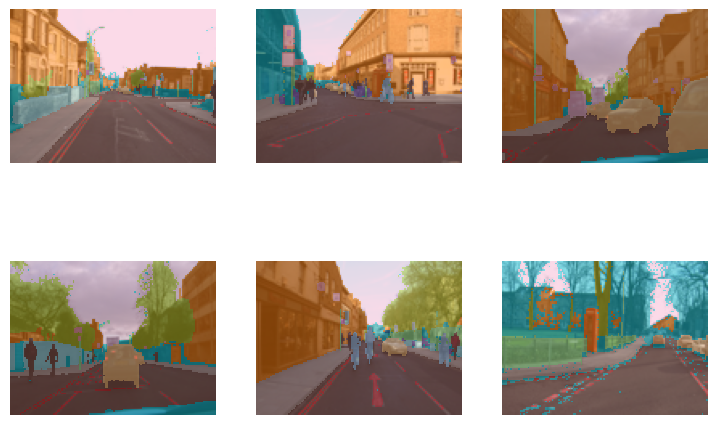

In [9]:
dls.show_batch(max_n=6)


In [10]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 61.6MB/s]


epoch,train_loss,valid_loss,time
0,2.938508,2.456765,00:03


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,time
0,1.788540,1.530699,00:01
1,1.684468,1.826690,00:01
2,1.581130,1.274882,00:02
3,1.434197,1.127296,00:01
4,1.309424,1.030038,00:01
5,1.214261,1.017033,00:01


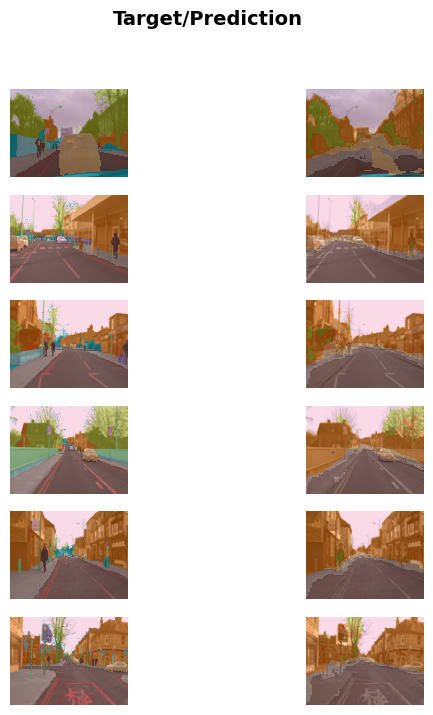

In [11]:
learn.show_results(max_n=6, figsize=(7,8))

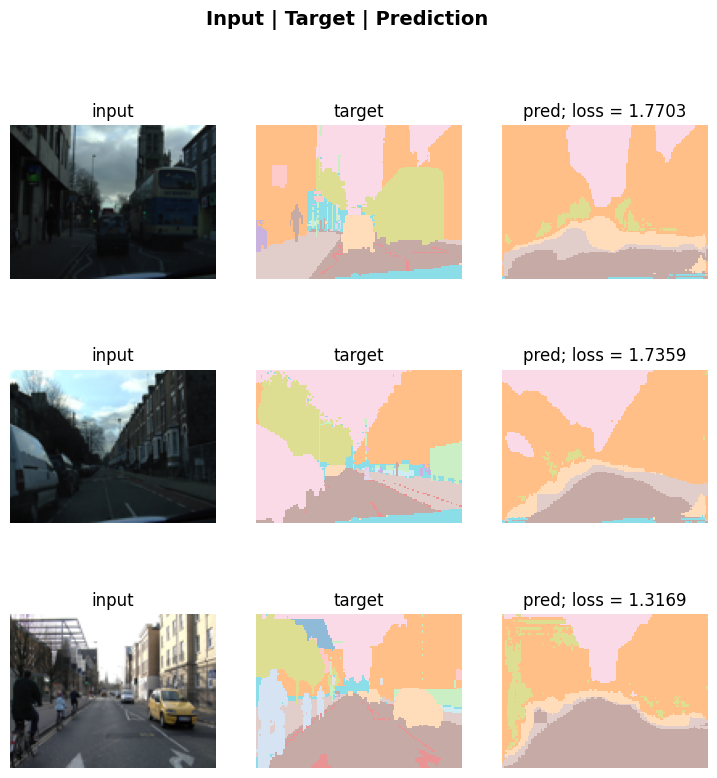

In [12]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=3)